# Spearman Correlation Analysis on Human Phenotype and Human Expression
## _Author(s): Wai Yuen (Wylliam) Cheng_

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import os
import sys
from tqdm import tqdm
import seaborn as sns

In [8]:
df_human_expression = pd.read_csv(f"{os.getcwd()}/../BE700_human_expression.(1) (1) (1).csv", index_col=0).T

#### Gene to Gene Correlation

In [9]:
print("Calculating the correlation matrix...")
gene_corr_matrix = df_human_expression.corr(method="spearman")
print("\nCorrelation matrix calculation completed:")
print(gene_corr_matrix)

Calculating the correlation matrix...

Correlation matrix calculation completed:
               NaN      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1  \
NaN       1.000000 -0.203073  0.209897  0.198079  0.181849 -0.080432   
A1BG     -0.203073  1.000000 -0.074768  0.117791 -0.126627  0.190972   
A1BG-AS1  0.209897 -0.074768  1.000000 -0.067084  0.174026 -0.213018   
A1CF      0.198079  0.117791 -0.067084  1.000000  0.040864 -0.010228   
A2M       0.181849 -0.126627  0.174026  0.040864  1.000000 -0.047107   
...            ...       ...       ...       ...       ...       ...   
ZYG11A    0.426037 -0.024586  0.216289  0.102764 -0.049221 -0.081683   
ZYG11B   -0.263673  0.183385  0.173882 -0.100504 -0.066122  0.157263   
ZYX       0.194142  0.087731  0.184878  0.156110  0.258391 -0.295654   
ZZEF1     0.234286  0.035870  0.122932  0.095894  0.066891 -0.095030   
ZZZ3      0.003890 -0.049796 -0.312276 -0.192797 -0.435966  0.089268   

             A2ML1     A2MP1    A4GALT     A4GNT  ... 

##### Saving Correlation of Gene2Gene

In [10]:
## Saving Correlation Coefficients
gene_corr_matrix.to_hdf("../human_expression_spearman_corr.h5", key="gene_spearman_corr")

/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_24864/3318346496.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis0] [items->None]

  gene_corr_matrix.to_hdf("../human_expression_spearman_corr.h5", key="gene_spearman_corr")
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_24864/3318346496.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis1] [items->None]

  gene_corr_matrix.to_hdf("../human_expression_spearman_corr.h5", key="gene_spearman_corr")
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_24864/3318346496.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_items] [items->None]

  gene_corr_matrix.to_hdf("../human_expre

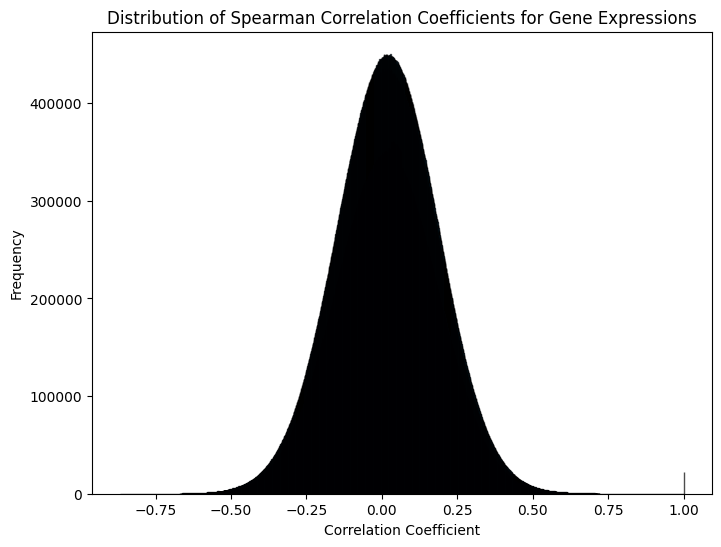

In [11]:
corr_coe = gene_corr_matrix.values.flatten()
plt.figure(figsize=(8, 6))
plt.hist(corr_coe, bins=5000, edgecolor='k', alpha=0.7)
plt.title("Distribution of Spearman Correlation Coefficients for Gene Expressions")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.show()

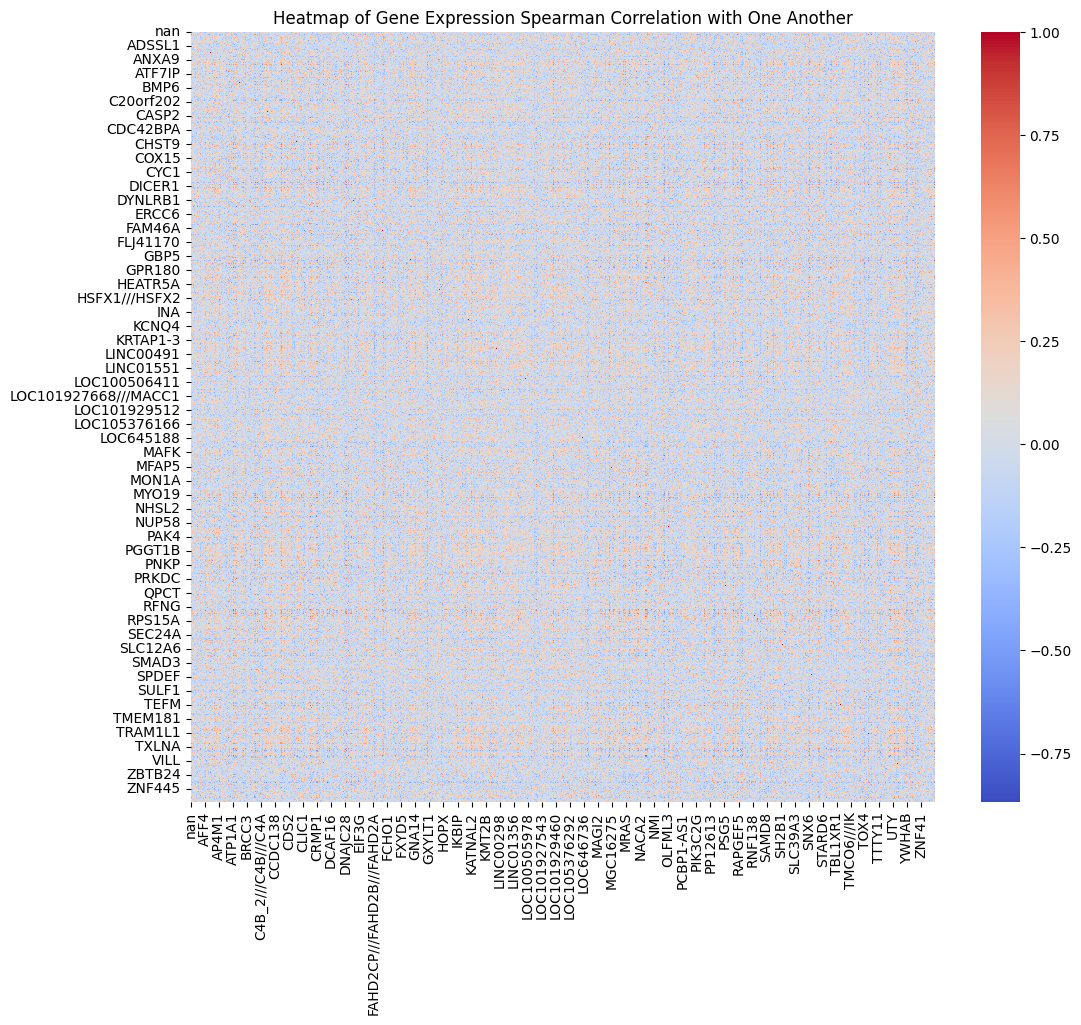

In [12]:
plt.figure(figsize=(12, 10))
plt.title('Heatmap of Gene Expression Spearman Correlation with One Another')
sns.heatmap(gene_corr_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.show()
# plt.colorbar(label='Normalized Expression Level')
# plt.xlabel('Samples')
# plt.ylabel('Genes (K-means Clustered)')
# plt.show()

In [13]:
gene_corr_matrix

NaN      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1  \
NaN       1.000000 -0.203073  0.209897  0.198079  0.181849 -0.080432   
A1BG     -0.203073  1.000000 -0.074768  0.117791 -0.126627  0.190972   
A1BG-AS1  0.209897 -0.074768  1.000000 -0.067084  0.174026 -0.213018   
A1CF      0.198079  0.117791 -0.067084  1.000000  0.040864 -0.010228   
A2M       0.181849 -0.126627  0.174026  0.040864  1.000000 -0.047107   
...            ...       ...       ...       ...       ...       ...   
ZYG11A    0.426037 -0.024586  0.216289  0.102764 -0.049221 -0.081683   
ZYG11B   -0.263673  0.183385  0.173882 -0.100504 -0.066122  0.157263   
ZYX       0.194142  0.087731  0.184878  0.156110  0.258391 -0.295654   
ZZEF1     0.234286  0.035870  0.122932  0.095894  0.066891 -0.095030   
ZZZ3      0.003890 -0.049796 -0.312276 -0.192797 -0.435966  0.089268   

             A2ML1     A2MP1    A4GALT     A4GNT  ...     ZWINT      ZXDA  \
NaN       0.308427  0.334262  0.249172  0.185804  ...  0.151885 -0.132677   
A1BG     -0.133253 -0.071693  0.029532  0.064208  ...  0.095990  0.273854   
A1BG-AS1  0.222142  0.094840  0.098202  0.026174  ... -0.341953  0.051574   
A1CF      0.265786  0.088115  0.183481  0.148250  ...  0.241489  0.019064   
A2M       0.267803  0.097719  0.075534 -0.012342  ...  0.109340 -0.202881   
...            ...       ...       ...       ...  ...       ...       ...   
ZYG11A    0.126918  0.099258  0.237125 -0.139753  ... -0.023194 -0.027276   
ZYG11B   -0.171285 -0.336375 -0.057191 -0.152572  ... -0.144682  0.273565   
ZYX       0.283265  0.217383  0.252725  0.154589  ...  0.209604 -0.334838   
ZZEF1     0.209604  0.229676  0.248211  0.253230  ...  0.040576  0.230924   
ZZZ3     -0.117887 -0.033277 -0.238896 -0.106661  ... -0.069868  0.292389   

              ZXDB  ZXDB///ZXDA      ZXDC    ZYG11A    ZYG11B       ZYX  \
NaN      -0.293926     0.206915  0.129796  0.426037 -0.263673  0.194142   
A1BG     -0.014550     0.108187 -0.197503 -0.024586  0.183385  0.087731   
A1BG-AS1 -0.103388     0.219597  0.064395  0.216289  0.173882  0.184878   
A1CF      0.060936    -0.056230 -0.022041  0.102764 -0.100504  0.156110   
A2M      -0.033854    -0.032893 -0.268379 -0.049221 -0.066122  0.258391   
...            ...          ...       ...       ...       ...       ...   
ZYG11A   -0.146078     0.003938  0.152369  1.000000 -0.056664  0.077121   
ZYG11B   -0.095030    -0.054118 -0.224394 -0.056664  1.000000 -0.298343   
ZYX      -0.104442     0.188571 -0.162353  0.077121 -0.298343  1.000000   
ZZEF1    -0.192893    -0.097623  0.218535  0.146846 -0.132869 -0.073709   
ZZZ3      0.041729     0.063721  0.357791  0.188768  0.070828 -0.629580   

             ZZEF1      ZZZ3  
NaN       0.234286  0.003890  
A1BG      0.035870 -0.049796  
A1BG-AS1  0.122932 -0.312276  
A1CF      0.095894 -0.192797  
A2M       0.066891 -0.435966  
...            ...       ...  
ZYG11A    0.146846  0.188768  
ZYG11B   -0.132869  0.070828  
ZYX      -0.073709 -0.629580  
ZZEF1     1.000000  0.145642  
ZZZ3      0.145642  1.000000  

[22190 rows x 22190 columns]

**We further filter the genes to be analyzed by the scale of correlation.**

We make all the value of the correlation plot positive first by using `abs()` function. Then sum the correlation of each gene expression to all other genes they correlated to, excluding the correlation with themselves. Then we rank the scale of correlation sum. The top 100 will be plotted below.

In [14]:
np_gene_corr_matrix = np.array(gene_corr_matrix)
np_gene_corr_matrix

array([[ 1.        , -0.20307323,  0.209897  , ...,  0.19414166,
         0.23428571,  0.00388956],
       [-0.20307323,  1.        , -0.0747677 , ...,  0.08773109,
         0.03587035, -0.04979592],
       [ 0.209897  , -0.0747677 ,  1.        , ...,  0.18487839,
         0.12293212, -0.31227641],
       ...,
       [ 0.19414166,  0.08773109,  0.18487839, ...,  1.        ,
        -0.07370948, -0.62957983],
       [ 0.23428571,  0.03587035,  0.12293212, ..., -0.07370948,
         1.        ,  0.14564226],
       [ 0.00388956, -0.04979592, -0.31227641, ..., -0.62957983,
         0.14564226,  1.        ]])

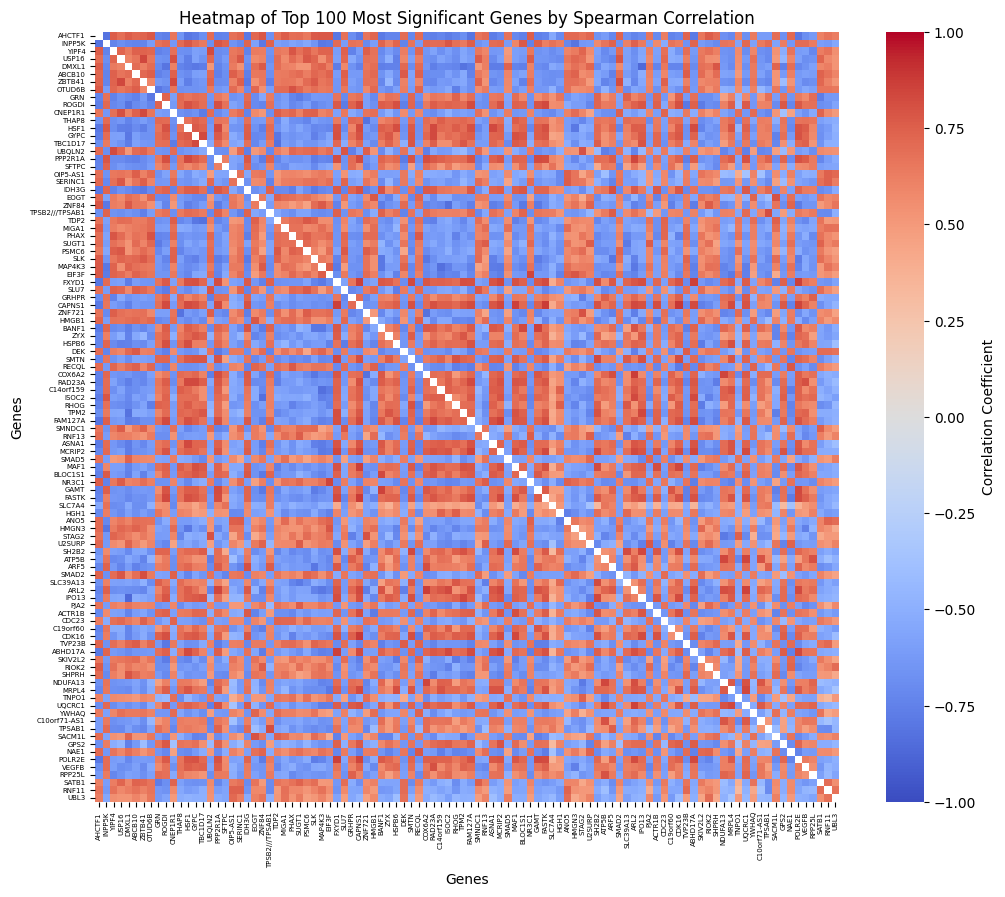

In [15]:
np.fill_diagonal(np_gene_corr_matrix, np.nan)

correlation_sums = np.nansum(np.abs(np_gene_corr_matrix), axis=1)

top_100_genes = np.argsort(-correlation_sums)[:100]

top_100_gene_symbols = gene_corr_matrix.columns[top_100_genes].tolist()

top_100_correlation_matrix = np_gene_corr_matrix[np.ix_(top_100_genes, top_100_genes)]

plt.figure(figsize=(12, 10))
sns.heatmap(top_100_correlation_matrix, 
            xticklabels=top_100_gene_symbols, 
            yticklabels=top_100_gene_symbols, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Top 100 Most Significant Genes by Spearman Correlation")
plt.xlabel("Genes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

In [16]:
print(f"The selected genes from this method: {top_100_gene_symbols}")

The selected genes from this method: ['AHCTF1', 'INPP5K', 'YIPF4', 'USP16', 'DMXL1', 'ABCB10', 'ZBTB41', 'OTUD6B', 'GRN', 'ROGDI', 'CNEP1R1', 'THAP8', 'HSF1', 'GYPC', 'TBC1D17', 'UBQLN2', 'PPP2R1A', 'SFTPC', 'OIP5-AS1', 'SERINC1', 'IDH3G', 'EOGT', 'ZNF84', 'TPSB2///TPSAB1', 'TDP2', 'MIGA1', 'PHAX', 'SUGT1', 'PSMC6', 'SLK', 'MAP4K3', 'EIF3F', 'FXYD1', 'SLU7', 'GRHPR', 'CAPNS1', 'ZNF721', 'HMGB1', 'BANF1', 'ZYX', 'HSPB6', 'DEK', 'SMTN', 'RECQL', 'COX6A2', 'RAD23A', 'C14orf159', 'ISOC2', 'RHOG', 'TPM2', 'FAM127A', 'SMNDC1', 'RNF13', 'ASNA1', 'MCRIP2', 'SMAD5', 'MAF1', 'BLOC1S1', 'NR3C1', 'GAMT', 'FASTK', 'SLC7A4', 'HGH1', 'ANO5', 'HMGN3', 'STAG2', 'U2SURP', 'SH2B2', 'ATP5B', 'ARF5', 'SMAD2', 'SLC39A13', 'ARL2', 'IPO13', 'PJA2', 'ACTR1B', 'CDC23', 'C19orf60', 'CDK16', 'TVP23B', 'ABHD17A', 'SKIV2L2', 'RIOK2', 'SHPRH', 'NDUFA13', 'MRPL4', 'TNPO1', 'UQCRC1', 'YWHAQ', 'C10orf71-AS1', 'TPSAB1', 'SACM1L', 'GPS2', 'NAE1', 'POLR2E', 'VEGFB', 'RPP25L', 'SATB1', 'RNF11', 'UBL3']


***

#### Gene to Phenotype Correlation

This section would be carried out to check the correlations between gene expression and continuous phenotype data

In [17]:
df_human_pheno = pd.read_csv(f"{os.getcwd()}/../human_pheno_postprocessed.csv", index_col=0)

In [18]:
df_cont_pheno = df_human_pheno.drop(columns=["family history:ch1", "gender:ch1", "diabete_2"])

**_There are missing data in the table. We can do either data imputation with the assistance of KNNImputer or completely removing those data. For the purpose of analysis, we will simply remove them to see the overall trend without patterns in data that we assumed to exist._**

In [19]:
df_cont_pheno.dropna(inplace=True)
df_cont_pheno

2 hour glucose (ogtt):ch1  age (years):ch1  \
GSM624925                      125.0               39   
GSM624926                      112.0               23   
GSM624927                      124.0               42   
GSM624928                      150.0               40   
GSM624930                       90.0               23   
GSM624931                       77.0               46   
GSM624932                       58.0               28   
GSM624933                       38.0               38   
GSM624934                      146.0               50   
GSM624935                       99.0               24   
GSM624936                      105.0               32   
GSM624937                       94.0               24   
GSM624938                      106.0               45   
GSM624939                       97.0               43   
GSM624940                      141.0               37   
GSM624941                      128.0               31   
GSM624942                      169.0               26   
GSM624943                      149.0               25   
GSM624944                      115.0               31   
GSM624945                      123.0               47   
GSM624946                       72.0               44   
GSM624947                      151.0               44   
GSM624948                      114.0               21   
GSM624949                      127.0               25   
GSM624950                      148.0               27   
GSM624951                      146.0               51   
GSM624952                      170.0               25   
GSM624953                      148.0               24   
GSM624954                      105.0               46   
GSM624955                      163.0               60   
GSM624956                       36.0               25   
GSM624957                       90.0               43   
GSM624958                      144.0               46   
GSM624959                      118.0               52   
GSM624960                      155.0               40   
GSM624971                       65.0               50   
GSM624972                      146.0               34   
GSM624973                      117.0               52   
GSM624974                       99.0               49   

           body mass index (kg/m2):ch1  fasting glucose (iv0gavg):ch1  \
GSM624925                           20                             90   
GSM624926                           23                             87   
GSM624927                           21                             79   
GSM624928                           27                             91   
GSM624930                           25                             91   
GSM624931                           26                             88   
GSM624932                           24                             83   
GSM624933                           25                             88   
GSM624934                           33                            109   
GSM624935                           24                             95   
GSM624936                           25                             85   
GSM624937                           30                             83   
GSM624938                           36                             96   
GSM624939                           30                             93   
GSM624940                           25                             95   
GSM624941                           20                             96   
GSM624942                           26                             92   
GSM624943                           39                             93   
GSM624944                           26                             85   
GSM624945                           23                             86   
GSM624946                           31                             94   
GSM624947                           25                             98   
GSM624948                           27             

In [20]:
## We would then have to remove the rows of same sample in the df_human_expression as well

dropped_sample_gsm = df_human_pheno[df_human_pheno.isna().any(axis=1)].index
df_human_expression_filtered = df_human_expression.drop(index=dropped_sample_gsm)
print(f"shape match: {df_human_expression_filtered.shape[0] == df_cont_pheno.shape[0]}")

shape match: True


In [21]:
pheno_expression_corr = pd.DataFrame(index=df_human_expression_filtered.columns, columns=df_cont_pheno.columns)

for col1 in df_human_expression_filtered.columns:
    for col2 in df_cont_pheno.columns:
        pheno_expression_corr.loc[col1, col2] = df_human_expression_filtered[col1].corr(df_cont_pheno[col2], method='spearman')

pheno_expression_corr = pheno_expression_corr.astype(float)
pheno_expression_corr

2 hour glucose (ogtt):ch1  age (years):ch1  \
NaN                        0.007493        -0.091614   
A1BG                      -0.020150        -0.283051   
A1BG-AS1                   0.007594         0.097695   
A1CF                       0.335966        -0.001520   
A2M                       -0.064297        -0.094046   
...                             ...              ...   
ZYG11A                    -0.237861         0.126128   
ZYG11B                     0.076549        -0.138738   
ZYX                        0.191576        -0.342134   
ZZEF1                      0.102673         0.202382   
ZZZ3                      -0.142770         0.320041   

          body mass index (kg/m2):ch1  fasting glucose (iv0gavg):ch1  \
NaN                          0.090415                       0.032943   
A1BG                         0.041801                       0.141199   
A1BG-AS1                     0.080855                      -0.119001   
A1CF                         0.064888                       0.144342   
A2M                         -0.287926                      -0.147382   
...                               ...                            ...   
ZYG11A                       0.280567                       0.192246   
ZYG11B                       0.378545                       0.169784   
ZYX                         -0.239820                      -0.100654   
ZZEF1                       -0.044140                       0.251280   
ZZZ3                         0.293927                       0.286352   

          fasting glucose (ogtt):ch1  fasting insulin (iv0inavg):ch1  \
NaN                        -0.078962                       -0.072698   
A1BG                        0.088997                        0.089202   
A1BG-AS1                    0.080178                        0.295449   
A1CF                        0.348792                        0.163418   
A2M                        -0.144139                       -0.182352   
...                              ...                             ...   
ZYG11A                      0.072479                       -0.122215   
ZYG11B                      0.274796                        0.316003   
ZYX                        -0.008312                        0.142966   
ZZEF1                       0.082814                       -0.086873   
ZZZ3                        0.131164                       -0.179618   

          hemoglobin a1c:ch1    si:ch1  waist hip ratio:ch1  
NaN                -0.298239 -0.080769            -0.004758  
A1BG               -0.052421 -0.153036            -0.052642  
A1BG-AS1           -0.118278  0.002632             0.369103  
A1CF                0.184949 -0.320445             0.189613  
A2M                -0.211006  0.107895            -0.151549  
...                      ...       ...                  ...  
ZYG11A             -0.032625  0.197378             0.308074  
ZYG11B              0.170088 -0.132996             0.055072  
ZYX                -0.136091 -0.100000             0.138085  
ZZEF1               0.169477  0.082794             0.218060  
ZZZ3                0.133648  0.060526            -0.110954  

[22190 rows x 9 columns]

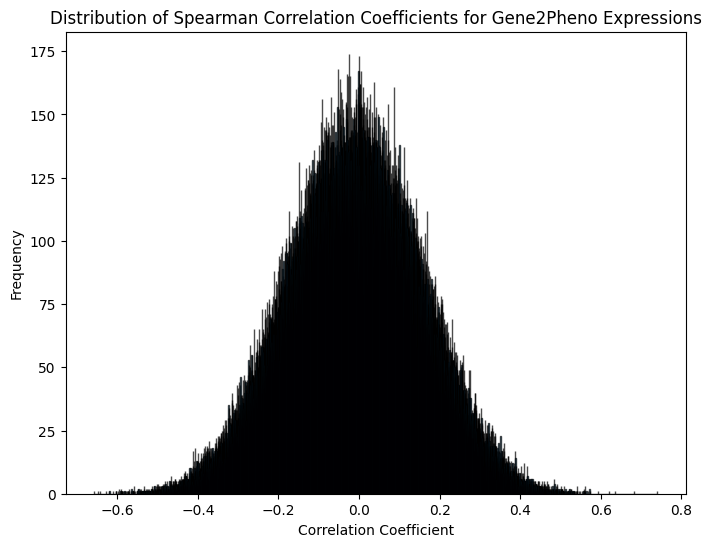

In [22]:
corr_coe = pheno_expression_corr.values.flatten()
plt.figure(figsize=(8, 6))
plt.hist(corr_coe, bins=5000, edgecolor='k', alpha=0.7)
plt.title("Distribution of Spearman Correlation Coefficients for Gene2Pheno Expressions")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.show()

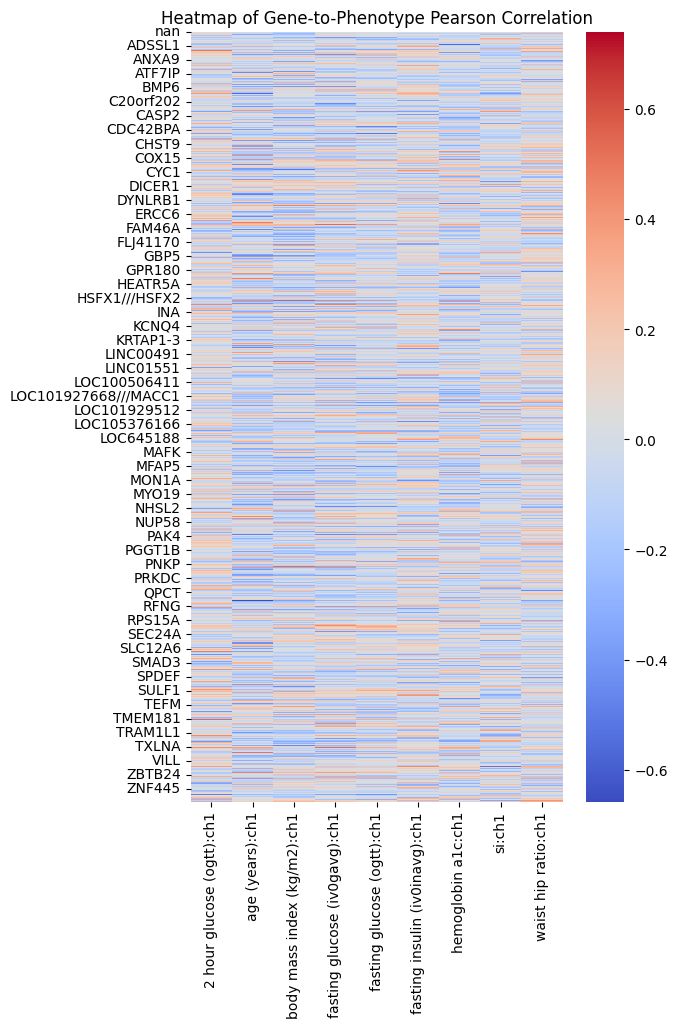

In [23]:
plt.figure(figsize=(6, 10))
plt.title('Heatmap of Gene-to-Phenotype Pearson Correlation')
sns.heatmap(pheno_expression_corr, annot=False, cmap="coolwarm", cbar=True)
plt.show()

**Again, we further filter the genes to be analyzed by the scale of correlation.**

We make all the value of the correlation plot positive first by using `abs()` function. Then sum the correlation of each gene expression to all other genes they correlated to, excluding the correlation with themselves. Then we rank the scale of correlation sum. The 100 genes with highest correlations with the phenotypes will be plotted below.

In [24]:
np_pheno_expression_corr = np.array(pheno_expression_corr)
np_pheno_expression_corr

array([[ 0.00749291, -0.09161396,  0.0904155 , ..., -0.29823877,
        -0.08076923, -0.00475805],
       [-0.02014986, -0.28305065,  0.04180064, ..., -0.05242081,
        -0.15303644, -0.05264224],
       [ 0.00759417,  0.09769453,  0.08085525, ..., -0.11827763,
         0.00263158,  0.36910306],
       ...,
       [ 0.19157555, -0.34213354, -0.23981973, ..., -0.13609052,
        -0.1       ,  0.13808464],
       [ 0.10267316,  0.20238172, -0.04413985, ...,  0.16947698,
         0.08279352,  0.21806034],
       [-0.14277036,  0.32004079,  0.29392664, ...,  0.13364761,
         0.06052632, -0.11095364]])

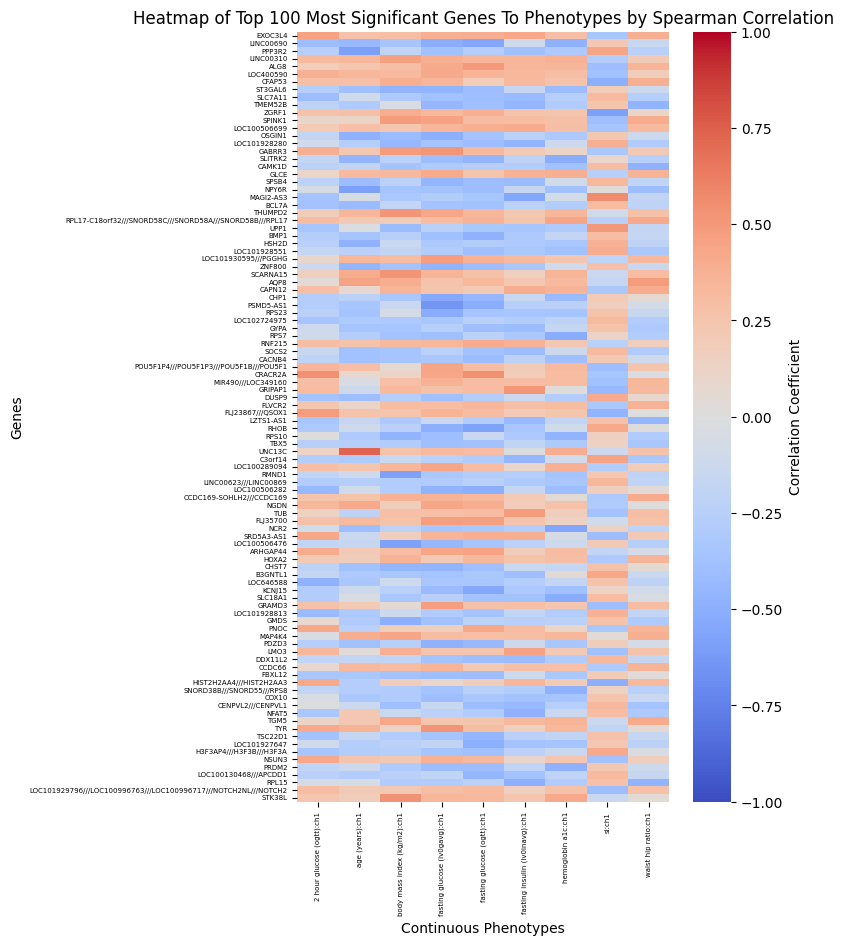

In [25]:
# np.fill_diagonal(np_pheno_expression_corr, np.nan)

correlation_sums = np.nansum(np.abs(np_pheno_expression_corr), axis=1)

top_100_genepheno = np.argsort(-correlation_sums)[:100]

top_100_genepheno_symbols = pheno_expression_corr.T.columns[top_100_genepheno].tolist()

top_100_genepheno_correlation_matrix = np_pheno_expression_corr[top_100_genepheno]

plt.figure(figsize=(6, 10))
sns.heatmap(top_100_genepheno_correlation_matrix, 
            xticklabels=list(df_cont_pheno.columns), 
            yticklabels=top_100_genepheno_symbols, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Top 100 Most Significant Genes To Phenotypes by Spearman Correlation")
plt.xlabel("Continuous Phenotypes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

##### Saving Correlation of Gene2Pheno

In [26]:
pheno_expression_corr.to_hdf("../gene_to_phenotype_spearman_corr.h5", key="gene2pheno_spearman_corr")

/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_24864/467694762.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis1] [items->None]

  pheno_expression_corr.to_hdf("../gene_to_phenotype_spearman_corr.h5", key="gene2pheno_spearman_corr")


## Comparison of top 100 Gene Extractions from Correlation

In [27]:
top_100_genepheno_symbols

['EXOC3L4',
 'LINC00690',
 'PPP3R2',
 'LINC00310',
 'ALG8',
 'LOC400590',
 'CFAP53',
 'ST3GAL6',
 'SLC7A11',
 'TMEM52B',
 'ZGRF1',
 'SPINK1',
 'LOC100506699',
 'OSGIN1',
 'LOC101928280',
 'GABRR3',
 'SLITRK2',
 'CAMK1D',
 'GLCE',
 'SPSB4',
 'NPY6R',
 'MAGI2-AS3',
 'BCL7A',
 'THUMPD2',
 'RPL17-C18orf32///SNORD58C///SNORD58A///SNORD58B///RPL17',
 'UPP1',
 'BMP1',
 'HSH2D',
 'LOC101928551',
 'LOC101930595///PGGHG',
 'ZNF800',
 'SCARNA15',
 'AQP8',
 'CAPN12',
 'CHP1',
 'PSMD5-AS1',
 'RPS23',
 'LOC102724975',
 'GYPA',
 'RPS7',
 'RNF215',
 'SOCS2',
 'CACNB4',
 'POU5F1P4///POU5F1P3///POU5F1B///POU5F1',
 'CRACR2A',
 'MIR490///LOC349160',
 'GRIPAP1',
 'DUSP9',
 'FLVCR2',
 'FLJ23867///QSOX1',
 'LZTS1-AS1',
 'RHOB',
 'RPS10',
 'TBX5',
 'UNC13C',
 'C3orf14',
 'LOC100289094',
 'RMND1',
 'LINC00623///LINC00869',
 'LOC100506282',
 'CCDC169-SOHLH2///CCDC169',
 'NGDN',
 'TUB',
 'FLJ35700',
 'NCR2',
 'SRD5A3-AS1',
 'LOC100506476',
 'ARHGAP44',
 'HOXA2',
 'CHST7',
 'B3GNTL1',
 'LOC646588',
 'KCNJ15',
 'S

In [28]:
top_100_gene_symbols

['AHCTF1',
 'INPP5K',
 'YIPF4',
 'USP16',
 'DMXL1',
 'ABCB10',
 'ZBTB41',
 'OTUD6B',
 'GRN',
 'ROGDI',
 'CNEP1R1',
 'THAP8',
 'HSF1',
 'GYPC',
 'TBC1D17',
 'UBQLN2',
 'PPP2R1A',
 'SFTPC',
 'OIP5-AS1',
 'SERINC1',
 'IDH3G',
 'EOGT',
 'ZNF84',
 'TPSB2///TPSAB1',
 'TDP2',
 'MIGA1',
 'PHAX',
 'SUGT1',
 'PSMC6',
 'SLK',
 'MAP4K3',
 'EIF3F',
 'FXYD1',
 'SLU7',
 'GRHPR',
 'CAPNS1',
 'ZNF721',
 'HMGB1',
 'BANF1',
 'ZYX',
 'HSPB6',
 'DEK',
 'SMTN',
 'RECQL',
 'COX6A2',
 'RAD23A',
 'C14orf159',
 'ISOC2',
 'RHOG',
 'TPM2',
 'FAM127A',
 'SMNDC1',
 'RNF13',
 'ASNA1',
 'MCRIP2',
 'SMAD5',
 'MAF1',
 'BLOC1S1',
 'NR3C1',
 'GAMT',
 'FASTK',
 'SLC7A4',
 'HGH1',
 'ANO5',
 'HMGN3',
 'STAG2',
 'U2SURP',
 'SH2B2',
 'ATP5B',
 'ARF5',
 'SMAD2',
 'SLC39A13',
 'ARL2',
 'IPO13',
 'PJA2',
 'ACTR1B',
 'CDC23',
 'C19orf60',
 'CDK16',
 'TVP23B',
 'ABHD17A',
 'SKIV2L2',
 'RIOK2',
 'SHPRH',
 'NDUFA13',
 'MRPL4',
 'TNPO1',
 'UQCRC1',
 'YWHAQ',
 'C10orf71-AS1',
 'TPSAB1',
 'SACM1L',
 'GPS2',
 'NAE1',
 'POLR2E',
 'VEGFB'

In [29]:
gene2pheno_set = set(top_100_genepheno_symbols)
gene_set = set(top_100_gene_symbols)

overlap = set(gene2pheno_set) & set(gene_set)
overlap_count = len(overlap)

print(f"Overlapping elements: {overlap}")
print(f"Number of overlapping elements: {overlap_count}")

Overlapping elements: set()
Number of overlapping elements: 0


**No overlapping genes at all: indicates the nodal genes in biological networks (those causing biggest fluctuation in other gene expressions) are not the genes with highly influences over phenotypical changes.**

*** 

### Threshold-Based Extraction

In [30]:
np.fill_diagonal(np_gene_corr_matrix, np.nan)
threshold_count = np.sum(np.abs(np_gene_corr_matrix) >= 0.75, axis=1)
index_75threshold = np.where(threshold_count > 0)[0]

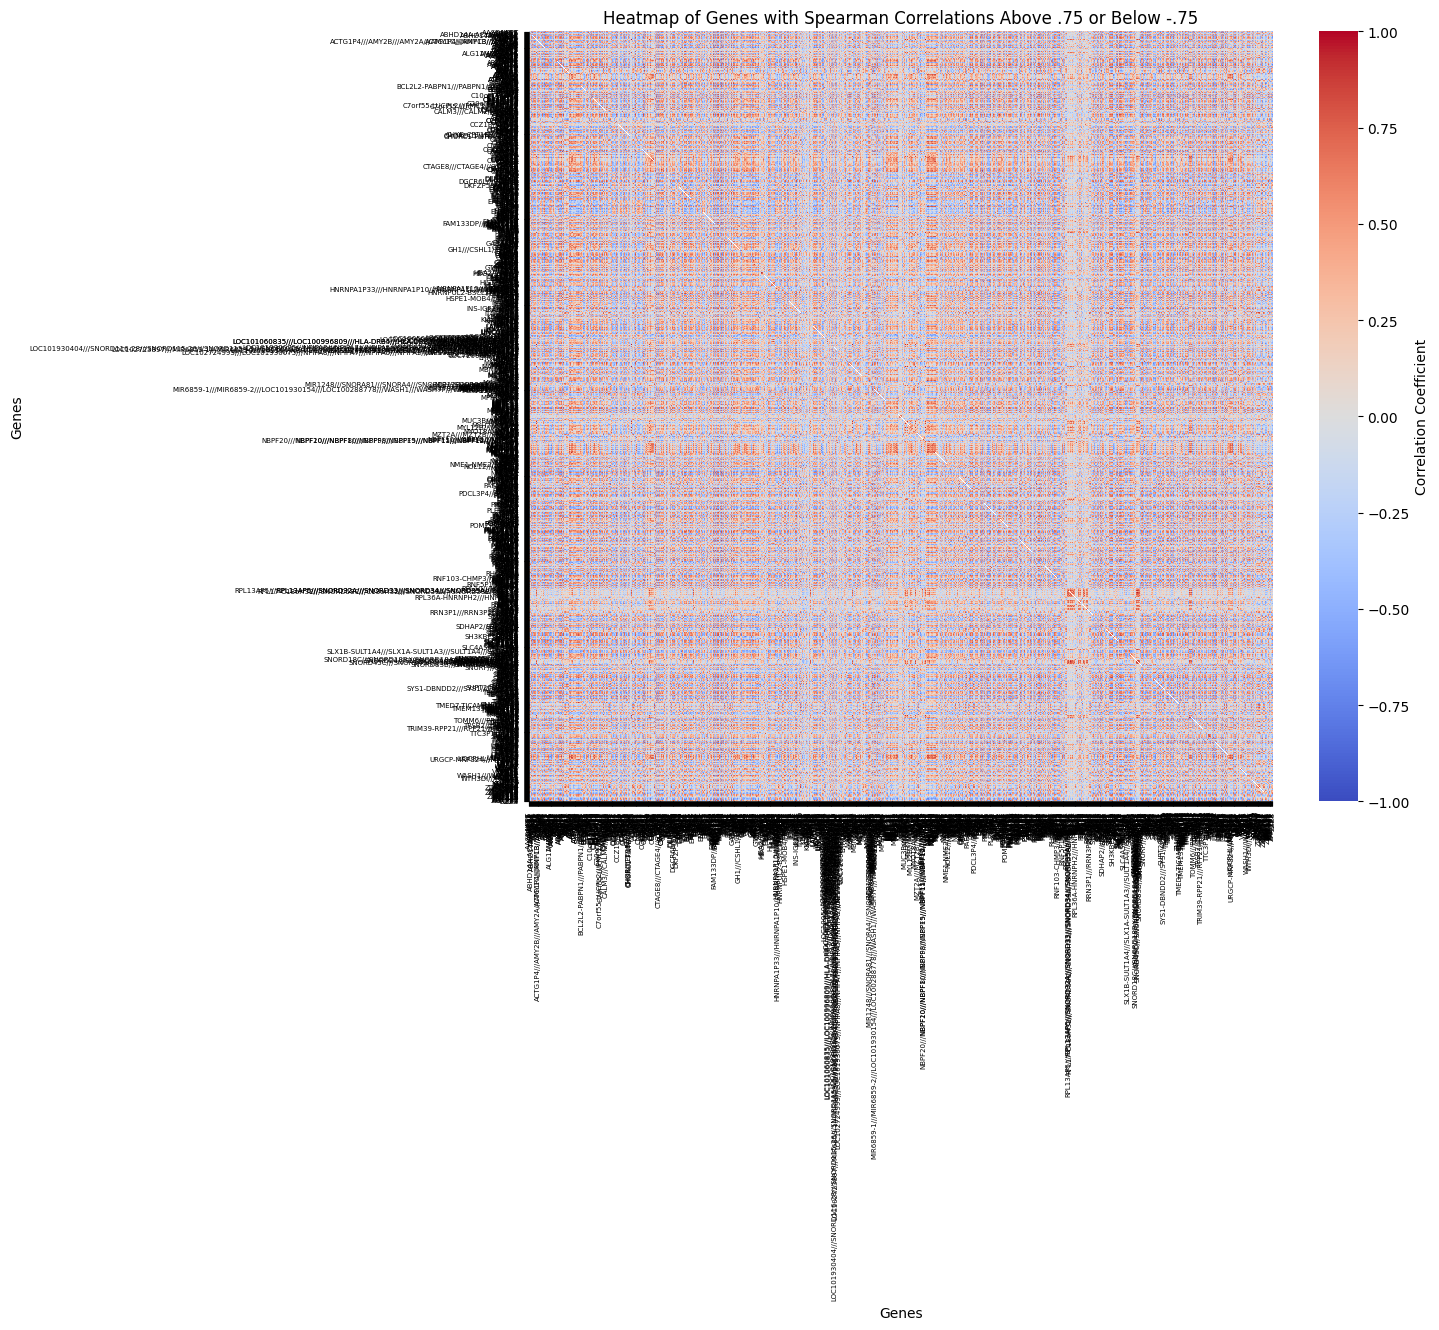

In [31]:
genes_beyond = gene_corr_matrix.columns[index_75threshold].tolist()
genes_beyond_correlation_matrix = np_gene_corr_matrix[np.ix_(index_75threshold, index_75threshold)]

plt.figure(figsize=(12, 10))
sns.heatmap(genes_beyond_correlation_matrix, 
            xticklabels=genes_beyond, 
            yticklabels=genes_beyond, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Genes with Spearman Correlations Above .75 or Below -.75")
plt.xlabel("Genes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

In [32]:
top_100_id_75thresh = np.argsort(-threshold_count)[:100]
top_100_id_75thresh

array([ 2366,  5716,  2887, 12386,  1041,  6281,  3382,  5758,  8157,
       20850, 13044, 12115,  1435, 18397,  5485,  2325, 15612,  3133,
        7671, 14619, 17969, 16751, 21157, 13047,    94,  4397, 17419,
       16845, 13569, 15426, 17599,   452, 20145,  2623, 19629, 15402,
        1784,  3649, 20847, 17861, 13567, 16273,  5033,  4040, 15233,
       16892,  1279, 13476, 18360,  6280,  3380, 17930,  3626, 18270,
        7129, 12845,  1305, 16904,   829, 14668, 15865, 15374, 19096,
        6721, 19837,  1500, 13311, 15294, 10215, 13041,   149, 18165,
       16308, 13571,  1281,  4857, 16916,  2139, 13545, 20753, 13310,
       16673,  4806, 15542,  7036,  1280,  4371,   470,  6405,  5968,
       21509, 12859,  7795, 18726, 20264, 17573, 20046,  3278,  3641,
       10762])

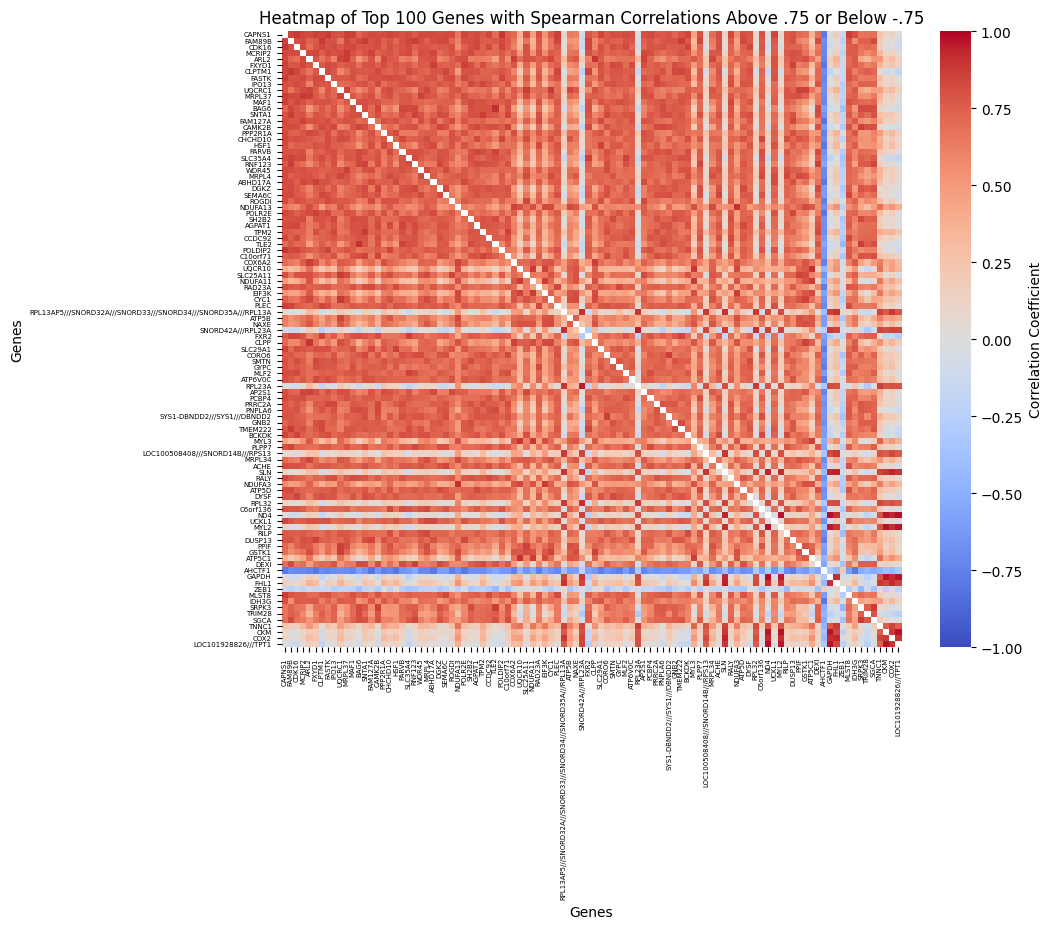

In [33]:
genes_beyond = gene_corr_matrix.columns[top_100_id_75thresh].tolist()
genes_beyond_correlation_matrix = np_gene_corr_matrix[np.ix_(top_100_id_75thresh, top_100_id_75thresh)]

plt.figure(figsize=(10, 8))
sns.heatmap(genes_beyond_correlation_matrix, 
            xticklabels=genes_beyond, 
            yticklabels=genes_beyond, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Top 100 Genes with Spearman Correlations Above .75 or Below -.75")
plt.xlabel("Genes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

In [34]:
threshold_count_pheno = np.sum(np.abs(np_pheno_expression_corr) >= 0.5, axis=1)
index_5threshold_pheno = np.where(threshold_count_pheno > 0)[0]
print(f"count: {len(index_5threshold_pheno)}")
print(index_5threshold_pheno)

count: 277
[   23    25   127   164   284   330   370   682   827  1022  1150  1246
  1254  1339  1359  1425  1672  1698  1700  1782  1880  1963  2026  2155
  2197  2206  2230  2231  2233  2376  2381  2496  2514  2598  2619  2742
  2832  2901  2920  2935  2966  2982  3188  3303  3304  3346  3357  3360
  3557  3585  3596  3701  3714  3722  3736  3775  3869  3954  3972  4024
  4172  4265  4368  4496  4497  4682  4731  4898  4946  5012  5291  5341
  5362  5396  5557  6072  6346  6390  6604  6757  6863  6947  6983  7055
  7080  7343  7384  7421  7514  7867  7922  7928  7930  7995  8071  8119
  8172  8219  8385  8443  8523  8687  8740  8789  8908  8914  8968  9038
  9047  9087  9238  9252  9387  9393  9412  9482  9494  9621  9647  9762
  9785  9811  9863  9875  9877  9921 10076 10082 10107 10202 10262 10290
 10421 10473 10492 10496 10611 10801 10845 10947 10964 11003 11056 11163
 11314 11581 11649 11736 11880 12075 12153 12284 12302 12373 12391 12401
 12482 12551 12820 12866 12973 12997 130

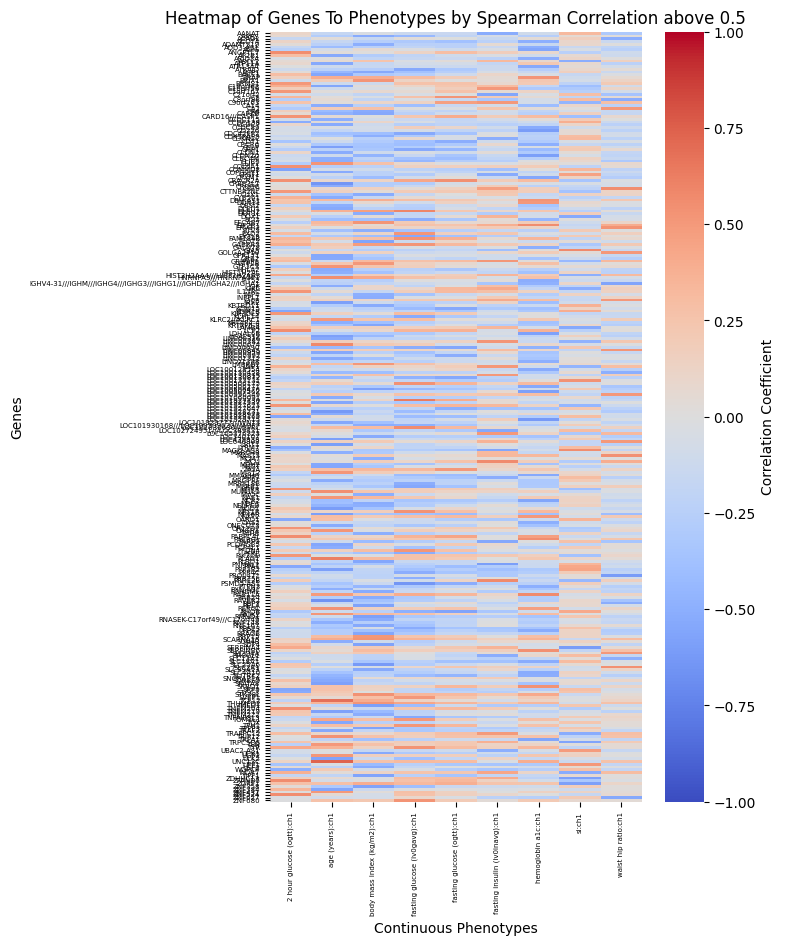

In [35]:
genes_beyond_point5 = pheno_expression_corr.T.columns[index_5threshold_pheno].tolist()

genes_beyond_point5_correlation_matrix = np_pheno_expression_corr[index_5threshold_pheno]

plt.figure(figsize=(6, 10))
sns.heatmap(genes_beyond_point5_correlation_matrix, 
            xticklabels=list(df_cont_pheno.columns), 
            yticklabels=genes_beyond_point5, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Genes To Phenotypes by Spearman Correlation above 0.5")
plt.xlabel("Continuous Phenotypes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

In [36]:
top_100_id_5thresh_pheno = np.argsort(-threshold_count_pheno)[:100]
top_100_id_5thresh_pheno

array([ 3722, 12153, 15966,  9393, 19325,  9921, 17813,  8908,   284,
       12401,  8914, 10202, 14186, 14184,  9482, 12820,  5396, 14178,
       20208,  7514, 14500, 13077, 12391,  5362,  6863,  3972, 19037,
        6604,   330, 21864,  2598, 10845,  5341, 21570,  4682,  9238,
        1246, 12373, 14467,  3775,  1254,  2619,  8071,  3188, 14758,
       19558,  9494, 10496, 10492,  1339,  1672, 15363,  8523, 10964,
        4368, 20868, 12075, 18723,  8172,  3714,  8968,  1359, 20841,
       10473, 21488, 21996, 18461,   682, 10947,  4024,  8119, 10082,
        1700,  3736,  1698,  4731,  9877,  2026,  5012, 14515, 13351,
       21958, 17249, 16393, 21518,  9863, 20185,  9875, 13649, 12866,
       17780,  3360, 20352, 12997, 13549,  6072,  8740, 10107, 17032,
        3303])

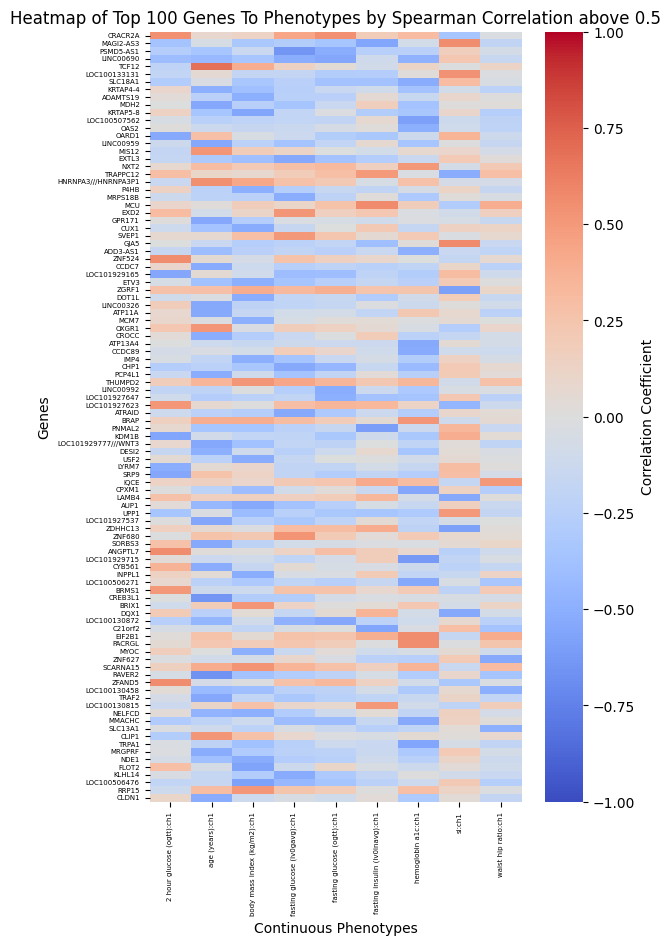

In [37]:
genes_beyond_point5_top100 = pheno_expression_corr.T.columns[top_100_id_5thresh_pheno].tolist()
genes_beyond_point5_top100_correlation_matrix = np_pheno_expression_corr[top_100_id_5thresh_pheno]

plt.figure(figsize=(6, 10))
sns.heatmap(genes_beyond_point5_top100_correlation_matrix, 
            xticklabels=list(df_cont_pheno.columns), 
            yticklabels=genes_beyond_point5_top100, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Top 100 Genes To Phenotypes by Spearman Correlation above 0.5")
plt.xlabel("Continuous Phenotypes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()